# Lab 2: Linear Regression using polynomials

## Goals
In this lab, you will:
- learn how to use polynomials to fit more complex models using linear regression.

<a name="toc_40291_2"></a>
# Problem Statement
As we saw in the previous lab, [linear regression](https://www.ibm.com/topics/linear-regression) analysis is used to predict the value of a variable (*y*) based on the value of another variable (*x*). The variable you want to predict is called the dependent variable (*y*). The variable you are using to predict the other variable's value is called the independent variable (*x*).

This form of analysis estimates the coefficients of a linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.



---



In this lab we are going to see how this algorithm works with a simple example, using the Python library "numpy", especifically the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions.

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays and create the models
*   The **"pyplot"** package from Matplotlib, that will allow us to plot some results

In [33]:
import numpy as np
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [34]:
# Plot a figure with the data and the regression function
def plot_data(xTrain, yTrain, model, name, xVal = None, yVal = None, validation = False):
  polyline = np.linspace(1.9, 13, 100)

  fig, ax = plt.subplots(figsize=(10, 7))
  plt.scatter(xTrain, yTrain, s=100, c = 'b')
  if validation:
    plt.scatter(xVal, yVal, s=100, c = 'orange')
  plt.rcParams.update({'font.size': 14})

  ax.set_xlabel('years(x)')
  ax.set_ylabel('price(y)')
  ax.set_title('price for used cars '+ name)

  ax.axis([1.5, 13, 0, 12000])
  ax.grid(True);
  plt.plot(polyline, model(polyline))


## DATA

In this case, we are presented with a simple problem: the price of used cars along the years. Cars are then presumed to be in a linear relationship with how old it is. We have two datasets:


*   Training data, where **xTrain** contains a single feature (car age) for the training dataset, and **yTrain** contains the ground truth labels of these samples, in this case the price of the car. This dataset will be used to fit the models we will train.
*   Validation data, where **xVal** contains the features of the validation dataset, so, the age of each car, and **yVal** contains the ground truth of these samples, in this case the price of the car. This dataset will be used to verify how accurate the fitted models are, using data that has not been used to train the model.

In [35]:
# Training data
xTrain = np.array([2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 9.5, 10, 11, 12, 12.5])
# Labels of the training data
yTrain = np.array([11200, 9950, 10750, 9400, 7500, 6300, 5800, 5700, 4200, 4400, 4200, 3800, 3950, 2700, 2100, 2500, 1850, 1800])

# Validation data
xVal = np.array([2.5, 2.75, 3.5, 4, 5, 5.75, 6.5, 7, 8, 8.5, 9, 10.5, 12, 9.5])
# Labels of the validation data
yVal = np.array([10250, 8750, 8500, 5800, 6200, 5000, 4500, 3500, 3250, 3000, 2250, 2500, 2250, 3800])

First, we are going to plot the training data and analize it.

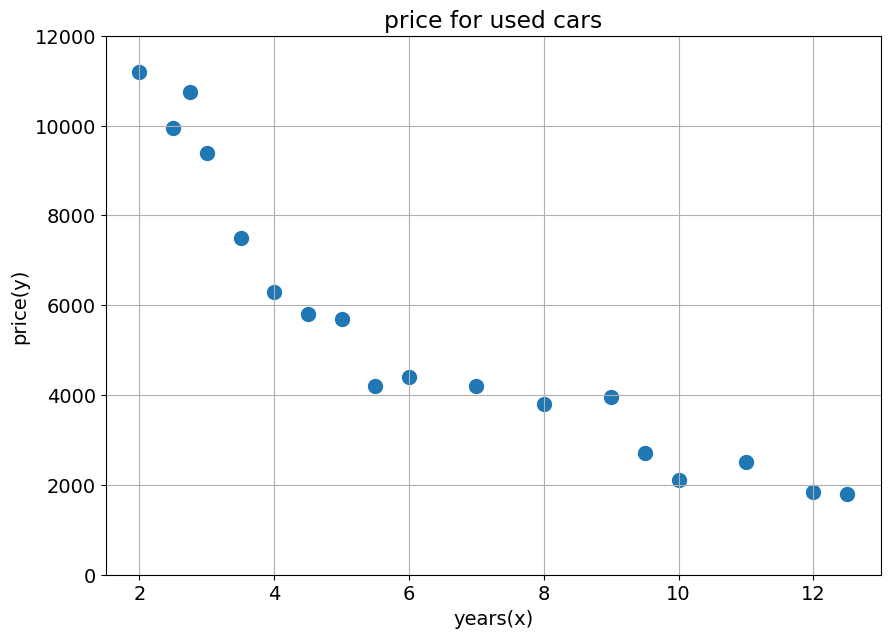

In [36]:
# Plot the training data
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(xTrain, yTrain, s=100)

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('years(x)')
ax.set_ylabel('price(y)')
ax.set_title('price for used cars')

ax.axis([1.5, 13, 0, 12000])
ax.grid(True)

<a name="toc_40291_2.2"></a>
##  Modeling Linear Regressions
To start, we have an example of how to create a basic regressions function with dregree = 1 using the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

Mean error train:
24.58


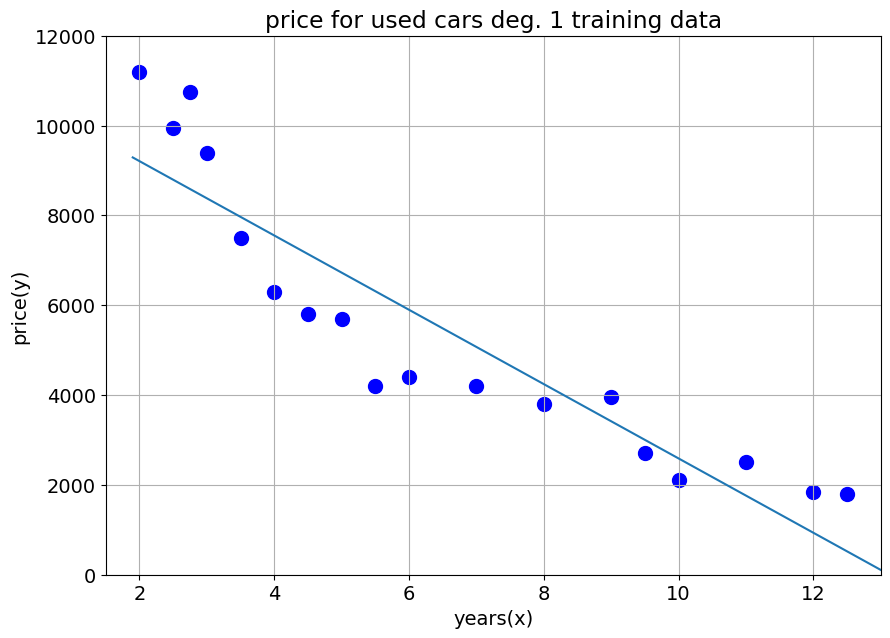

In [37]:
#polynomial fit with degree = 1
modeld1 = np.poly1d(np.polyfit(xTrain, yTrain, 1))
#mean error percentatge is computed for the train data
print("Mean error train:")
per1 = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100 #In summary, this code computes the average percentage error of the linear model modeld1 when applied to the training data. It gives an indication of how well the linear model fits the data, where a lower percentage error indicates a better fit to the data. This can be a useful way to assess the accuracy of the model's predictions.
print(round(per1,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 training data")

Sometimes a higher degree function give better results to our problems.

Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones. **Which one is better?**   

<font color='red'>**Answer: The lines which are closer to the most of the points is the better model. Campring with 2 degree polynomial and 4 degree polynomial the 4 degree is the better one as it closer to the most the points. As the linear one also closer to less number of points the 4 degree polynomial model is the better one. It is also noted that the 4 degree model has the least mean error.**


Mean error train deg. 2:
14.21
Mean error train deg. 4:
8.81


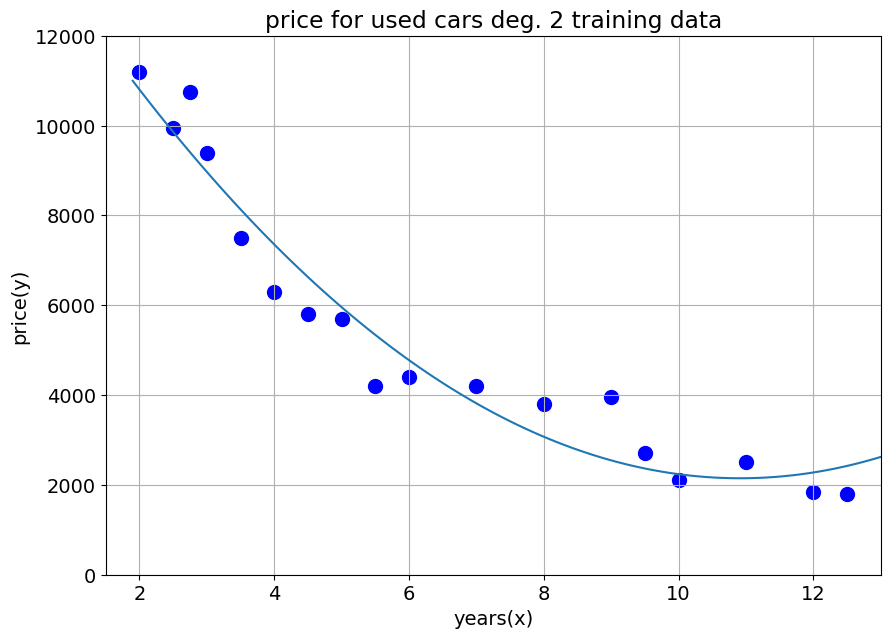

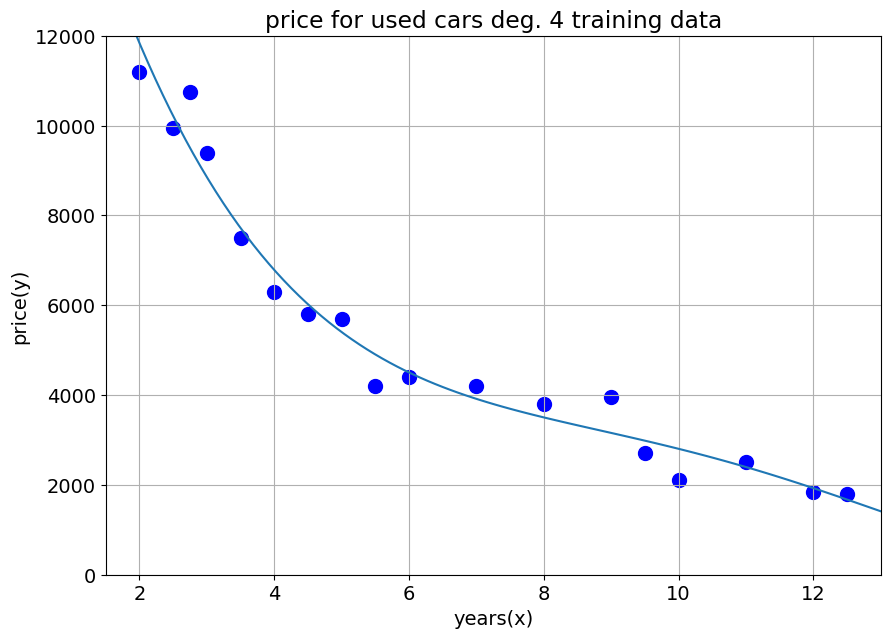

In [38]:
# TO DO: Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones.
#polynomial fit with degree = 2
modeld2 = np.poly1d(np.polyfit(xTrain, yTrain, 2)) #__________TO DO__________giving coefficient of the hyper parameter value as array values ployfit and polyid creats the function of this parameters
#mean error percentatge is computed for the train data
print("Mean error train deg. 2:")
per2 = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100 #__________TO DO__________
print(round(per2,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 training data")

#polynomial fit with degree = 4
modeld4 = np.poly1d(np.polyfit(xTrain, yTrain, 4)) #__________TO DO__________
#mean error percentatge is computed for the train data
print("Mean error train deg. 4:")
per4 = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100#__________TO DO__________
print(round(per4,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 training data")

As we saw before, we have another dataset called "validation data" that allows us to further check which model is better for us. Compute the mean error percentage for the model with the validation data and compare them with the training data . **Now, which model do you think is better for our data? Is it the same as the one chosen before? Explain why.**

<font color= 'red'>Answer: It will remain the same as the previous one. The polynomial degree 4 model is the better one. As we can see the mean error of the degree three model has the lowest values for the training data. Although, the test data, the polynomial degree 4 model mean error has increased a little from the polynomial degree 2 model, by taking into consideration of the training data, we can say that, polynomial degree 4 is the best one. From the graph, we can also see that most of the points are colser to the polynomial degree 4 model. Although, there is not much difference between the polynomial degree 2 and 4 model from the graph, but taking into consideration of mean error the polynomial degree 4 model is the best one.

Mean error train model deg 1: 24.58
Mean error test model deg 1: 25.17
Mean error train model deg 2: 14.21
Mean error test model deg 2: 9.98
Mean error train model deg 4: 8.81
Mean error test model deg 4: 12.3


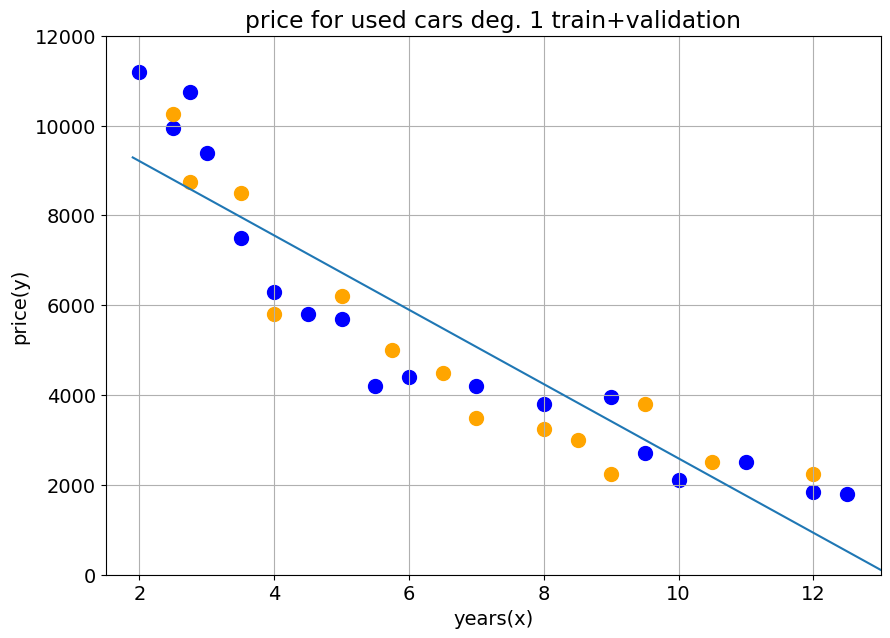

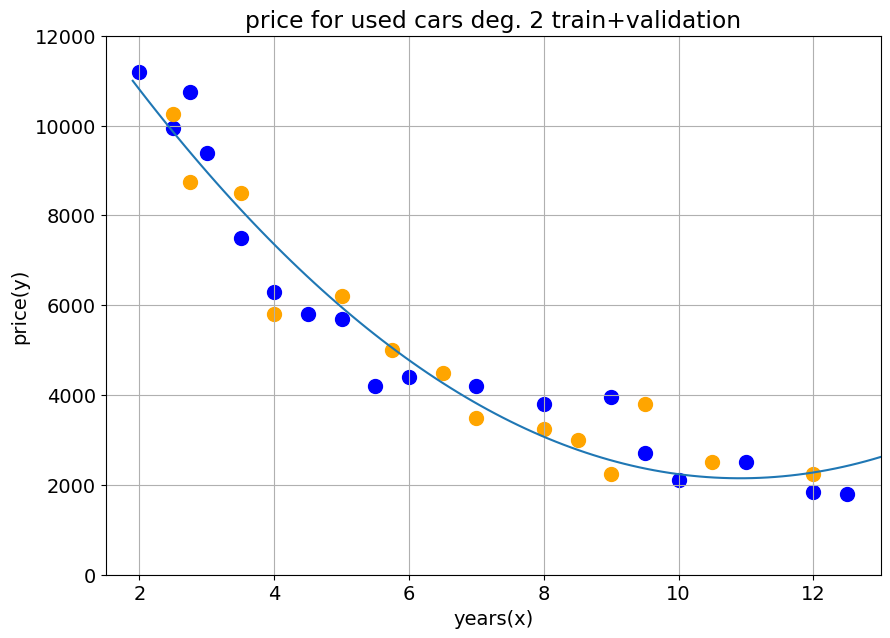

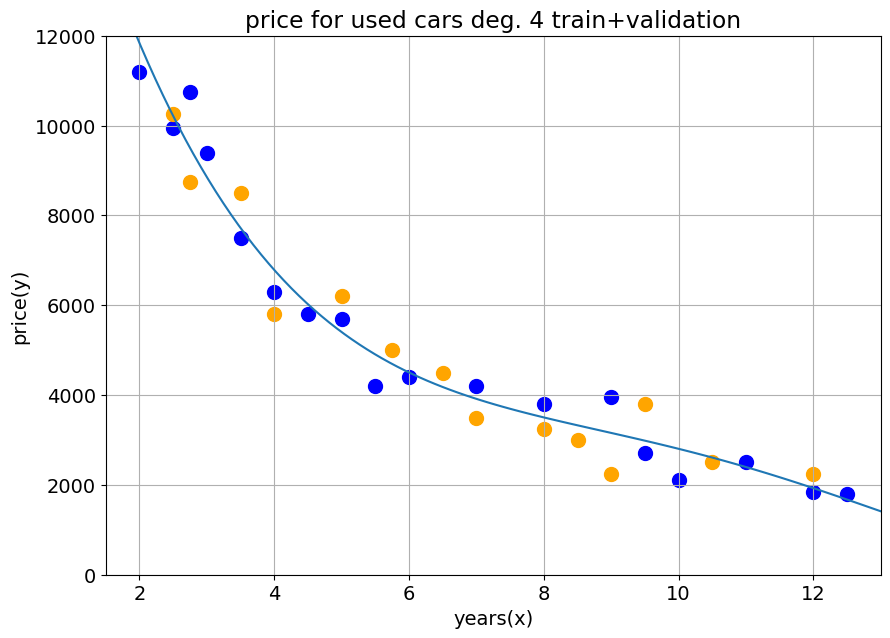

In [39]:
#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 1:",round(per1,2))
#__________TO DO__________

#mean error percentatge is computed for the validation data

per1VAL = np.sum(np.abs(modeld1(xVal)-yVal)/yVal)/len(yVal)*100 #In summary, this code computes the average percentage error of the linear model modeld1 when applied to the training data. It gives an indication of how well the linear model fits the data, where a lower percentage error indicates a better fit to the data. This can be a useful way to assess the accuracy of the model's predictions.
print("Mean error test model deg 1:", round(per1VAL,2))

#__________TO DO__________

# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 2:", round(per2,2))
#__________TO DO__________
#mean error percentatge is computed for the validation data

per2VAL = np.sum(np.abs(modeld2(xVal)-yVal)/yVal)/len(yVal)*100 #In summary, this code computes the average percentage error of the linear model modeld1 when applied to the training data. It gives an indication of how well the linear model fits the data, where a lower percentage error indicates a better fit to the data. This can be a useful way to assess the accuracy of the model's predictions.

print("Mean error test model deg 2:",round(per2VAL,2))
#__________TO DO__________

# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 4:",round(per4,2))
#__________TO DO__________

#mean error percentatge is computed for the validation data

per4VAL = np.sum(np.abs(modeld4(xVal)-yVal)/yVal)/len(yVal)*100 #In summary, this code computes the average percentage error of the linear model modeld1 when applied to the training data. It gives an indication of how well the linear model fits the data, where a lower percentage error indicates a better fit to the data. This can be a useful way to assess the accuracy of the model's predictions.


print("Mean error test model deg 4:",round(per4VAL,2))
#__________TO DO__________

# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 train+validation", xVal, yVal, True)

In reality, when running Gradient Descent, your loss is computed as the Mean Squared Error.
1. Import the function "mean_squared_error" from the library "sklearn.metrics"
2. Create a FOR loop that trains models from degree 1 to degree 14
3. Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".


[1139035.1781437532, 406056.4255161988, 350732.4718125762, 351929.99004613905, 490565.5840571059, 559819.6906721198, 555035.8328522575, 551504.126946234, 623854.3729493963, 686784.5470355384, 683898.1535111947, 794175.4795480983, 859041.1620981051, 911188.8054096492]
[1497428.8455250978, 518522.3091726209, 266259.01944789133, 259139.950578145, 204363.55901135903, 155890.84592566095, 155740.1667721578, 155028.38488484273, 144365.93399105637, 103349.15741455804, 99196.83369696417, 50188.22267959493, 35298.72199071123, 30678.245619213158]


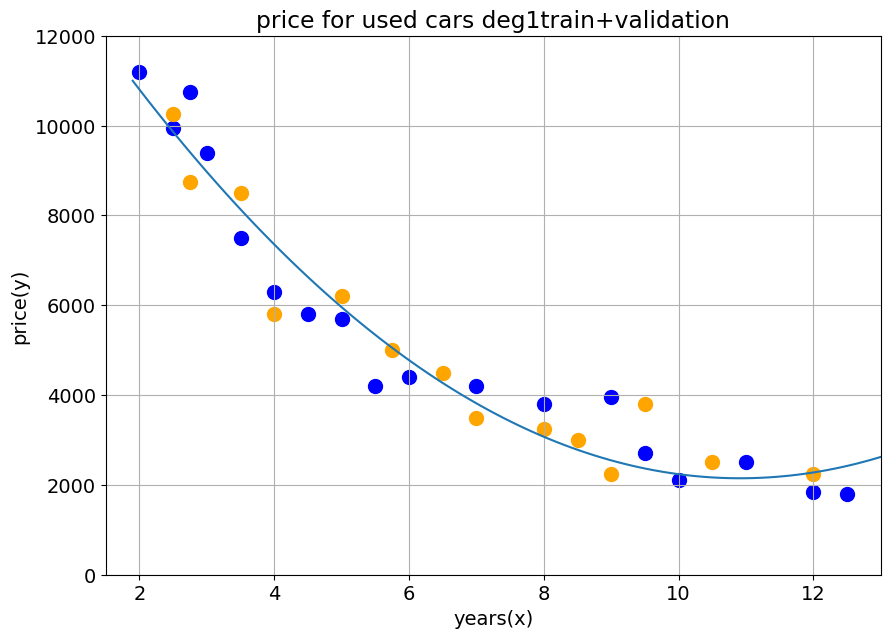

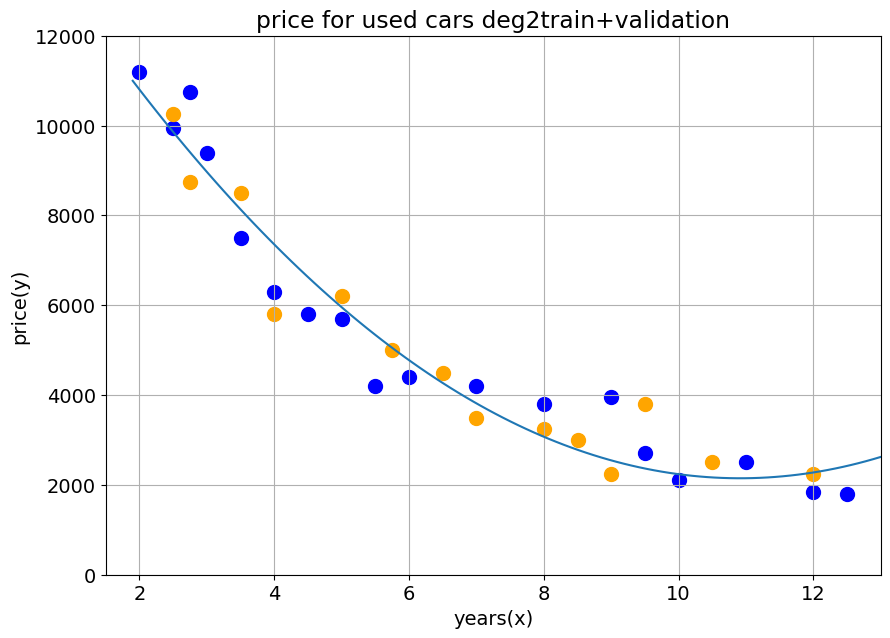

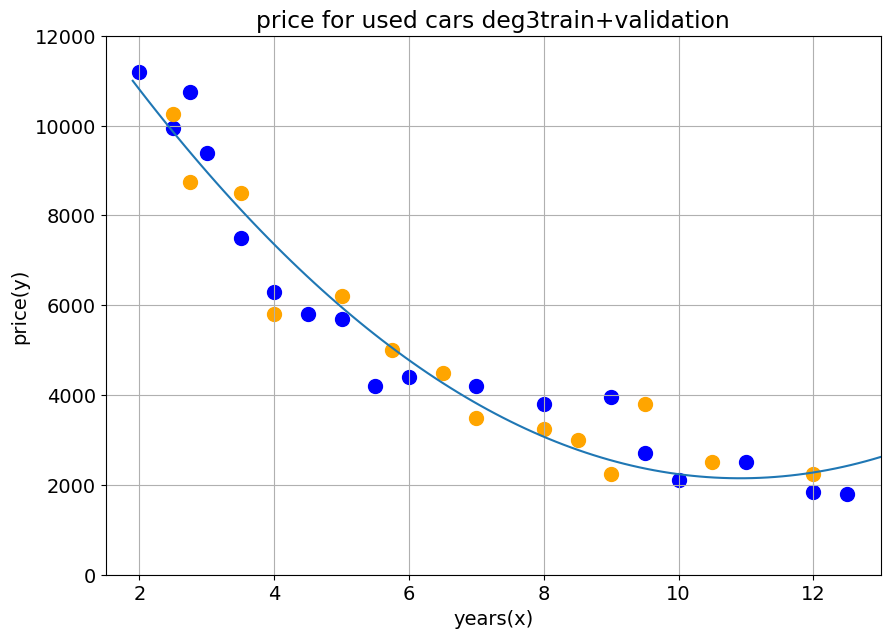

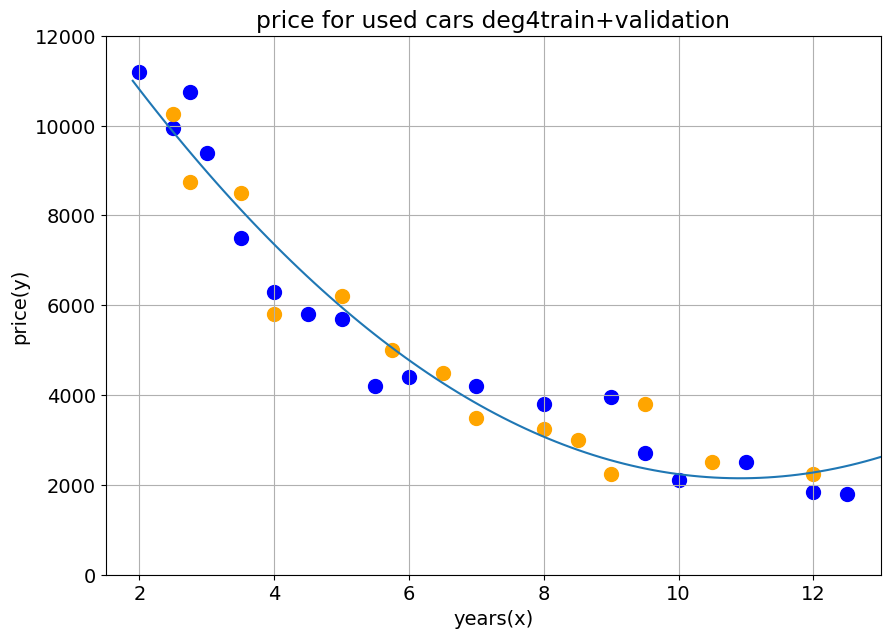

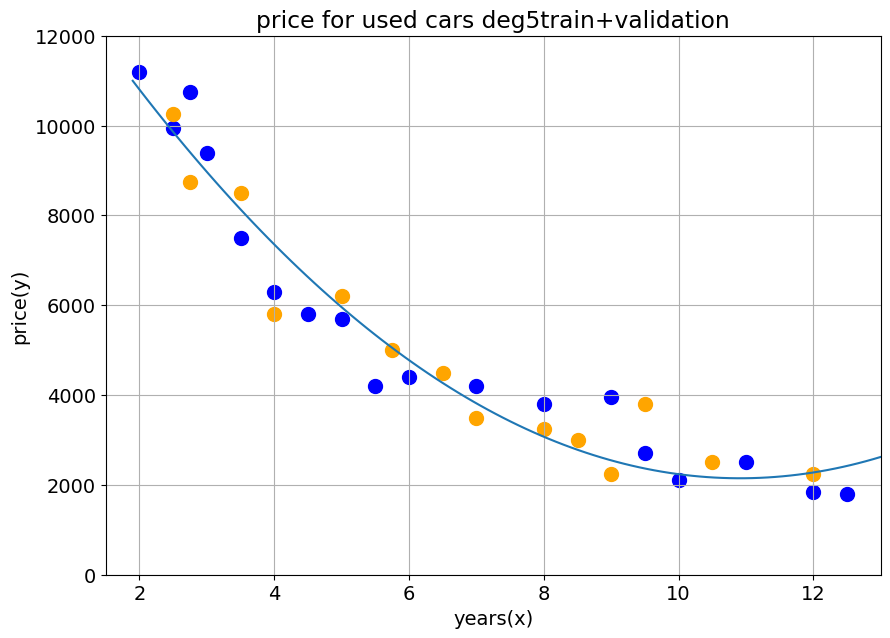

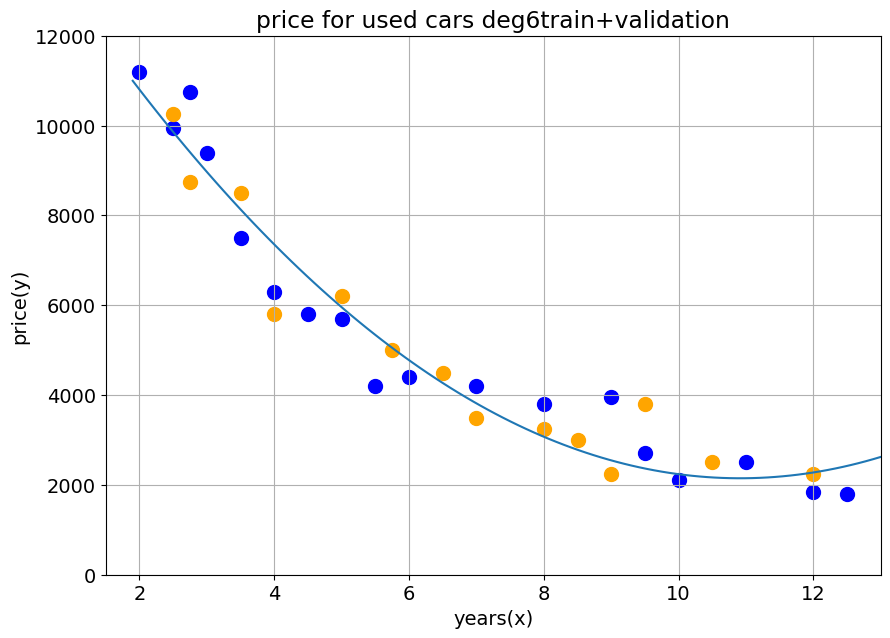

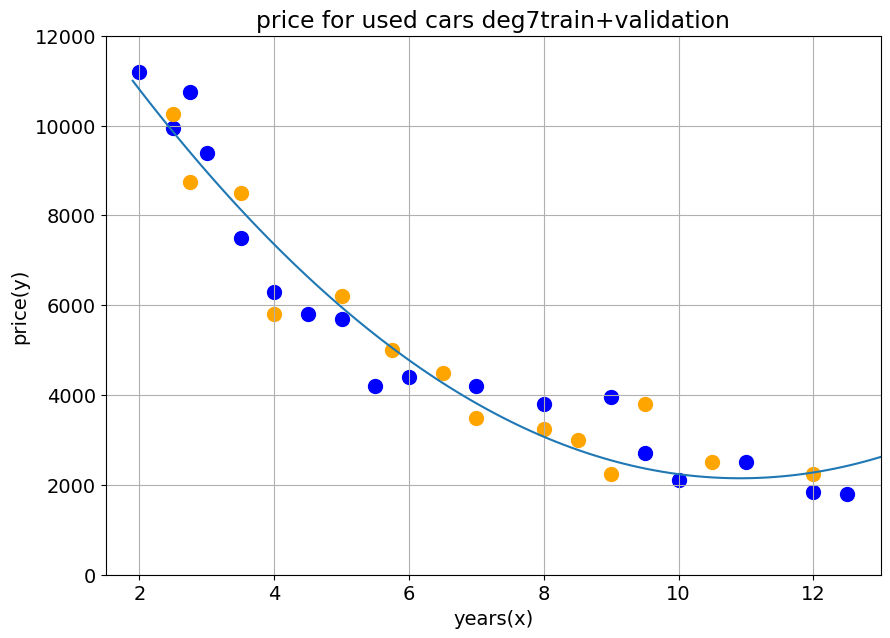

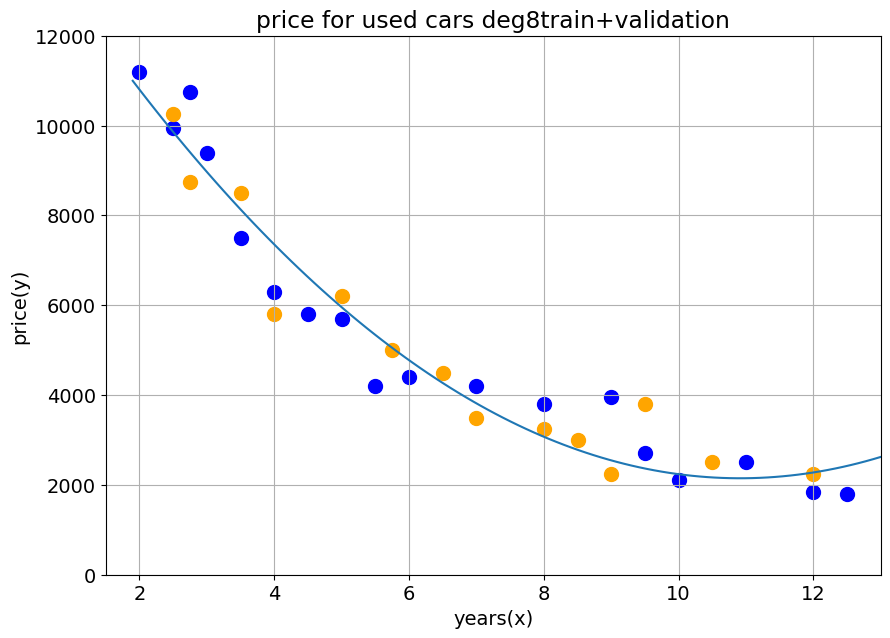

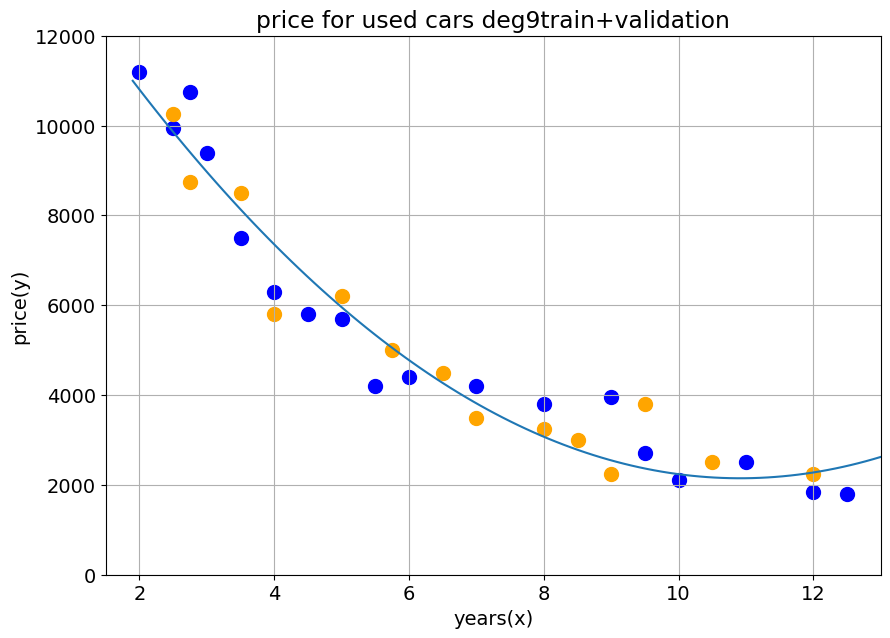

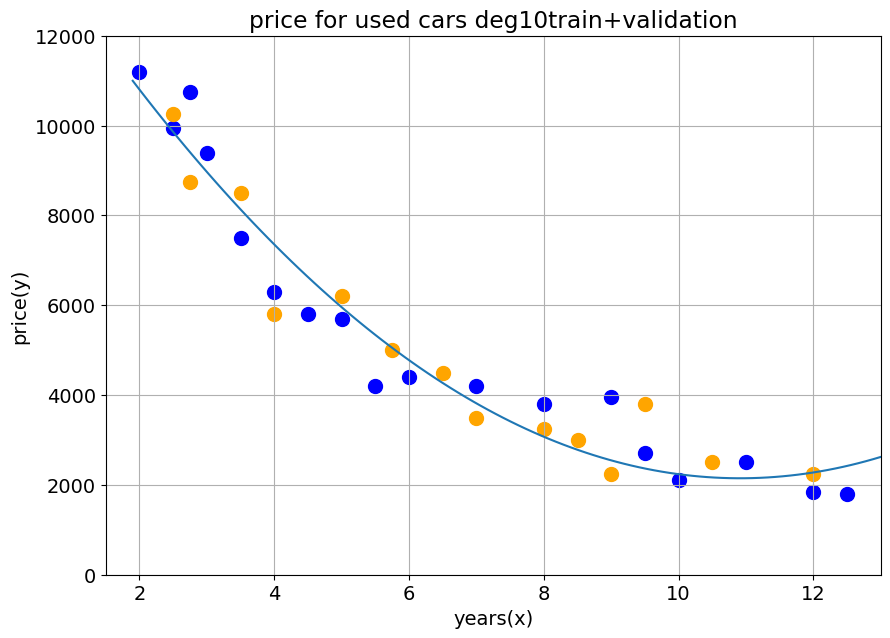

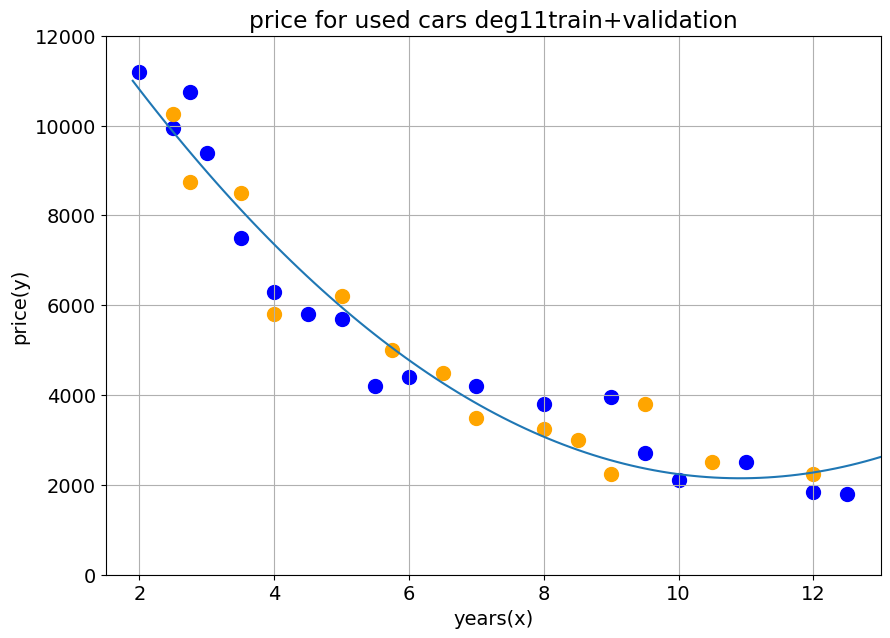

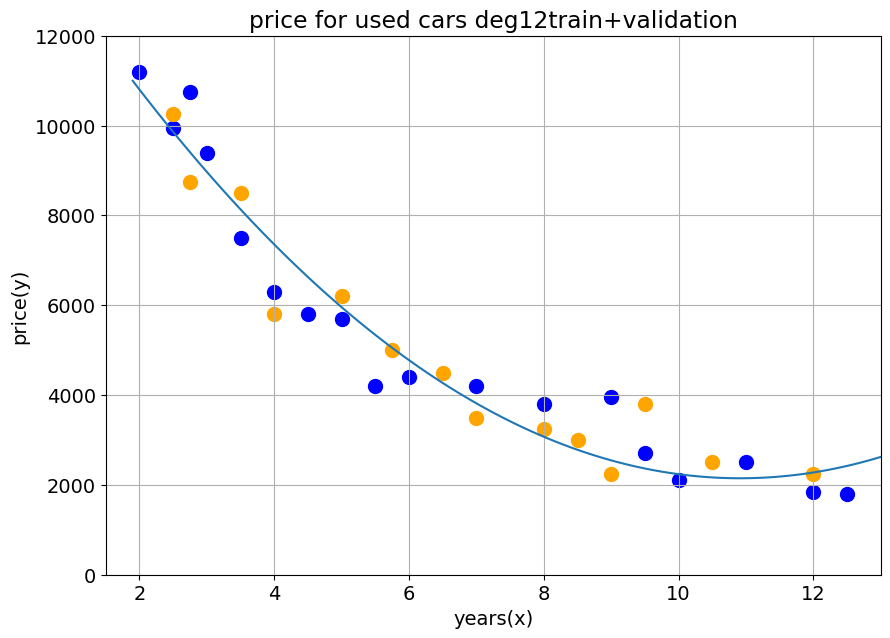

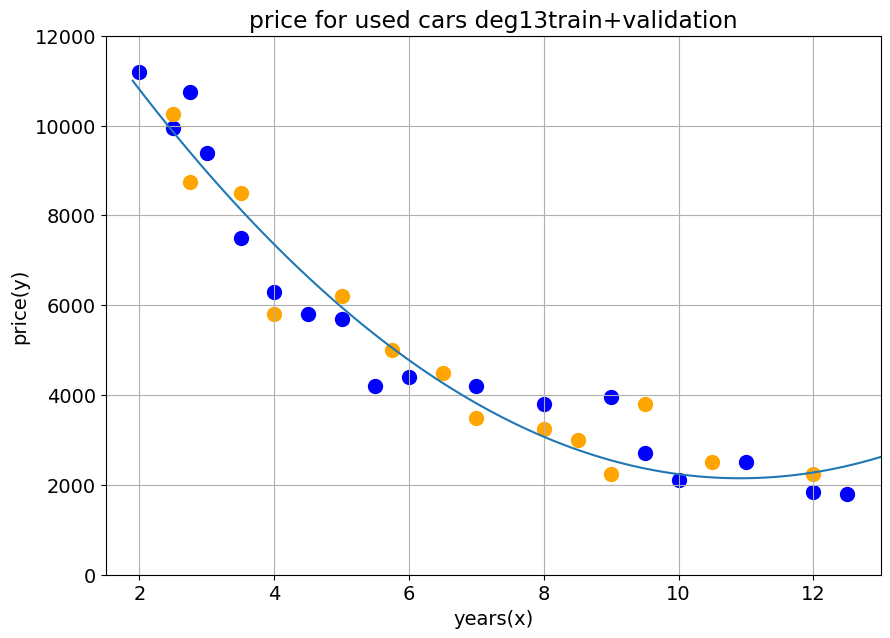

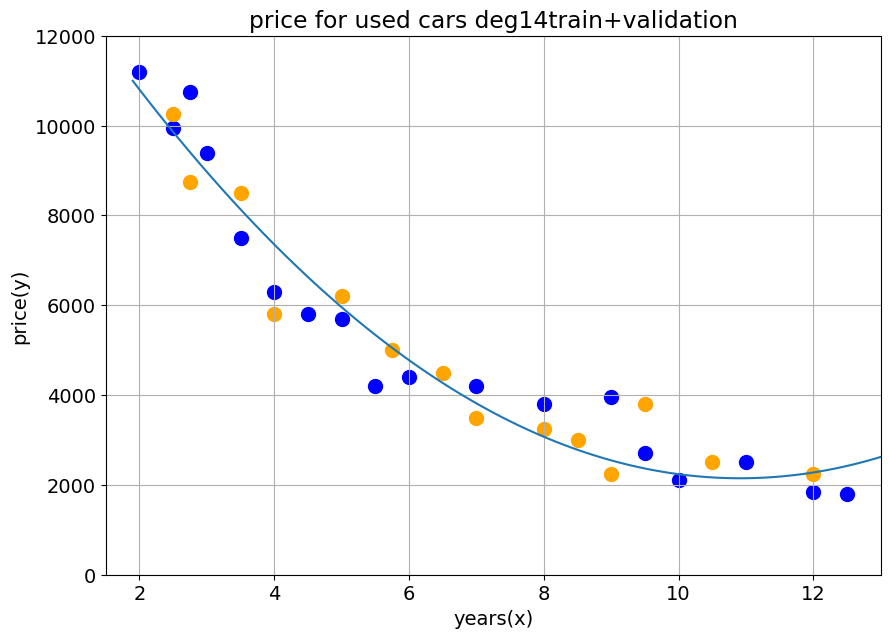

In [40]:
from sklearn.metrics import mean_squared_error

#__________TO DO__________
# For loop
TrainMSE=[]
ValMSE=[]
degrees = range(1, 15)
for degree in degrees:
  model1=np.poly1d(np.polyfit(xTrain, yTrain, degree))
  y_pric_train = model1(xTrain)
  train_mse= mean_squared_error(yTrain, y_pric_train)
  y_pric_val = model1(xVal)
  val_mse= mean_squared_error(yVal, y_pric_val)
  plot_data(xTrain, yTrain, modeld2, "deg" + str( degree ) +"train+validation", xVal, yVal, True)
  TrainMSE.append(train_mse)
  ValMSE.append(val_mse)

print(ValMSE)
print(TrainMSE)

#__________TO DO__________

Plot "TrainMSE" and "ValMSE" for every degree of polynomial. **What would be the best model? Explain why**

<font color='red'> For the 1st two polynomial degree we can ovserve the underfitting or high bais situation is observed in the model. From 5th degree polynomial to 14 th degree polynomial, there is high variance or overfitting situations. while from 3rd and 4th degree polynomial we can see the good fit.But the 4th degree polynomial has the lowest mean square error. So, 4 degree polynomial model is the best model.

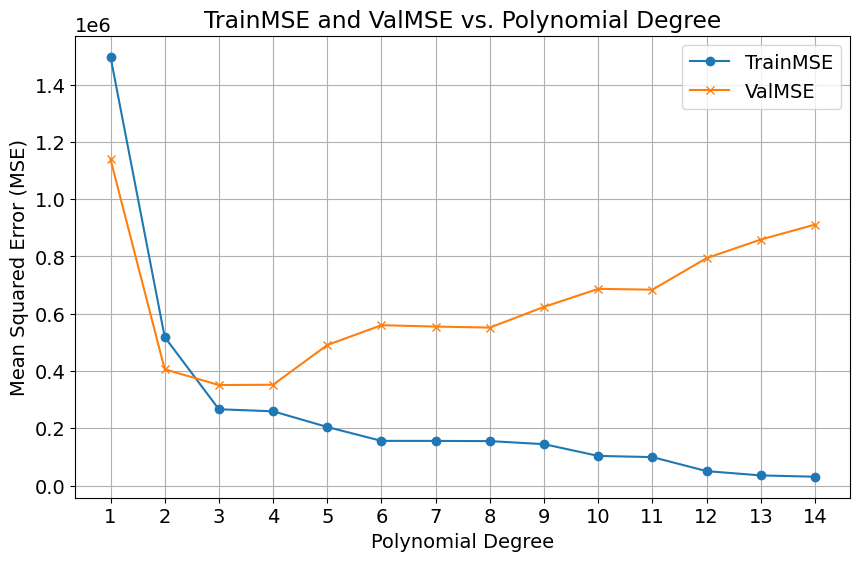

In [41]:
# Plot TrainMSE and ValMSE to compare the fitted models computed above
degrees=range(1, 15)
plt.figure(figsize=(10, 6))
plt.plot(degrees, TrainMSE, label="TrainMSE", marker='o')
plt.plot(degrees, ValMSE, label="ValMSE", marker='x')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("TrainMSE and ValMSE vs. Polynomial Degree")
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.show()

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.